In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import PMTPosition as PMT

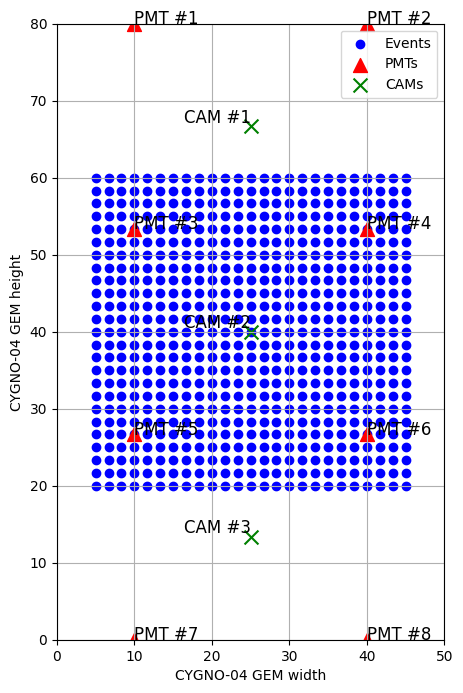

In [2]:
GEM_width,  GEM_height = PMT.GetGEMsDim()
GEM_z_dist = PMT.GetGEMsZ()

## Create points inside the GEM frame
## Straight line
# n_events = 30
# pos = PMT.GenEventPosition(x_offset = 0.0, size = n_events, distribution = 'fixedY', x_start = 5, x_end = 45,  y_offset = 45)

## Random points in whole plane
# n_events = 100
# pos = PMT.GenEventPosition(x_offset = 0.0, size = n_events, distribution = 'uniform')

## Points in square grid
### Case 1
n_events = 625
pos = PMT.GenEventPosition(size = n_events, distribution = 'grid', x_start = 5, x_end = 45, rows = 25, y_start = 20, y_end = 60)
### Case 2
# n_events = 10000
# pos = PMT.GenEventPosition(size = n_events, distribution = 'grid', x_start = 5, x_end = 45, rows = 50, y_start = 20, y_end = 60)


## Standard configuration of Cameras and PMTs
### Scanned PMT X positions
# DX = -0.83333
# DX = 0                         
DX = 1.66666          
# DX = 4.16666          
# DX = 11.6666665

CAM_pos = np.array([[GEM_width/2, GEM_height/2 + GEM_height/3],
                    [GEM_width/2, GEM_height/2],
                    [GEM_width/2, GEM_height/2 - GEM_height/3]
                   ])

PMT_pos = np.array([[GEM_width/2 - GEM_height/3/2-DX, GEM_height/2 + GEM_height/3+GEM_height/3/2],
                    [GEM_width/2 + GEM_height/3/2+DX, GEM_height/2 + GEM_height/3+GEM_height/3/2],
                    [GEM_width/2 - GEM_height/3/2-DX, GEM_height/2 + GEM_height/3-GEM_height/3/2],
                    [GEM_width/2 + GEM_height/3/2+DX, GEM_height/2 + GEM_height/3-GEM_height/3/2],
                    [GEM_width/2 - GEM_height/3/2-DX, GEM_height/2 - GEM_height/3+GEM_height/3/2],
                    [GEM_width/2 + GEM_height/3/2+DX, GEM_height/2 - GEM_height/3+GEM_height/3/2],
                    [GEM_width/2 - GEM_height/3/2-DX, GEM_height/2 - GEM_height/3-GEM_height/3/2],
                    [GEM_width/2 + GEM_height/3/2+DX, GEM_height/2 - GEM_height/3-GEM_height/3/2],
                   ])
# print("CAMs positions:\n {}".format(CAM_pos))
# print("PMTs positions:\n {}".format(PMT_pos))


## Plotting
plt.figure(figsize=(5, 8))
plt.scatter(pos[:, 0], pos[:, 1], color='blue', label='Events')
plt.scatter(PMT_pos[:, 0], PMT_pos[:, 1], color='red', label='PMTs', marker='^', s=100)
plt.scatter(CAM_pos[:, 0], CAM_pos[:, 1], color='green', label='CAMs', marker='x', s=100)

# Adding labels and title
plt.xlabel('CYGNO-04 GEM width')
plt.ylabel('CYGNO-04 GEM height')
plt.xlim(0,GEM_width)
plt.ylim(0,GEM_height)
# plt.title('CYGNO 04 GEM plane')
plt.legend()
plt.grid(True)

for i in range(8):
    plt.text(PMT_pos[i, 0], PMT_pos[i, 1], "PMT #{}".format(i+1), fontsize=12)
for i in range(3):
    plt.text(CAM_pos[i, 0], CAM_pos[i, 1], "CAM #{}".format(i+1), fontsize=12, ha='right', va='bottom')

plt.show()

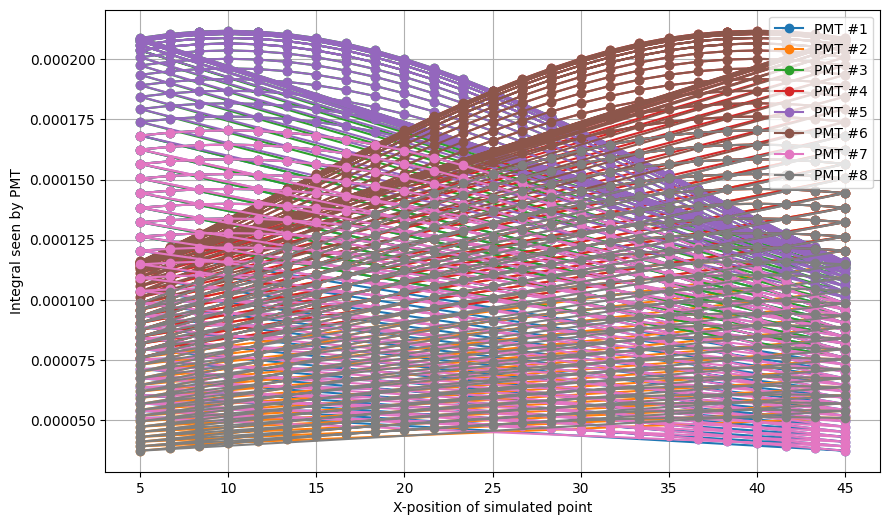

In [3]:
# Get distances between simulated points and PMTs
R_all   = PMT.GetR_All(PMT_pos = PMT_pos, Event_pos = pos)

# Get integral / intensity each PMT see for each point, assuming a typical 55Fe spot
ints = PMT.GetIntegrals(R_all, energy = 5.9, LY = 8500.0)

# Re-arrange data
n_PMTS = len(PMT_pos)
series_data = []
for i in range(n_PMTS):

    n_series = ints[:,i]
    series_data.append(n_series)

# Plot intensity of point observed by PMT, organized by point's X
x_values = pos[:,0]
plt.figure(figsize=(10, 6))
for pmt_i in range(len(series_data)):
    plt.plot(x_values, series_data[pmt_i], marker='o', label='PMT #{}'.format(pmt_i+1))

plt.xlabel('X-position of simulated point')
plt.ylabel('Integral seen by PMT')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
## Create input for BAT
### BAT is a Bayesian framework fit that retrieves the X, Y and L variables from an event, given the waveforms of the PMTs for that event.

PMT.create_bat_input(n_evts = n_events, ints = ints, fname = "./outputs/dx_{:.3f}_bat_input.txt".format(DX))
PMT.create_mc_truth(positions = pos, fname = "./outputs/dx_{:.3f}_mc_truth.txt".format(DX))